In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import resources.Get_Data as Get_Data
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
getter = Get_Data.Get_Data("^IXIC", "2022-02-15", "1h")#.make_norm_diff()
#szereg = Get_Data.Get_Data("^IXIC", start="2021-09-20", end='2022-02-20', interval="1d").make_diff()
szereg = pd.read_csv("sim.csv")['x'][:300]
getter.analiza_statystyczna_szeregu(szereg_pandas=szereg)

In [ ]:
par = 0.8

arima = ARIMA(szereg[:int(len(szereg) * par)], order=(1, 0, 0))
arima = arima.fit()

In [64]:
forec = np.array([])

for i in range(0, int(len(szereg) * (1 - par))+1):
    arima = ARIMA(szereg[:(int(round(len(szereg) + i) * par))], order=(1, 0, 0))
    arima = arima.fit()
    forec = np.append(forec, arima.forecast(1))

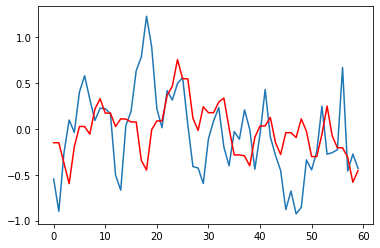

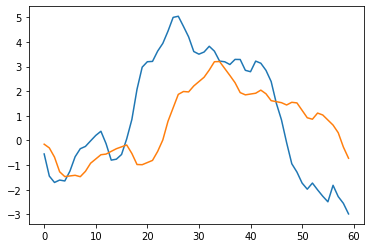

PEARSON'S CORRELATION:  0.15585653171366365


In [66]:
plt.plot(szereg[int(len(szereg) * par):].values)
plt.plot(forec, c='r')
plt.show()

plt.plot(np.cumsum(szereg[int(len(szereg) * par):].values))
plt.plot(np.cumsum(forec))
plt.show()
print("PEARSON'S CORRELATION: ", np.corrcoef(forec, szereg[int(len(szereg) * par):].values)[0, 1])